## This program tries to implement a very basic face detector ##

Steps:

1. Get train images for positive/negative classes
2. Decide what features to use
3. Train a classifier for faces
4. Detect boxes from test image
5. Extract features and match
6. Display results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters, feature, color, data
import os

In [2]:
def imNormalize(image):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
    else:
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r,g,b),axis=2) 


def colorHistogram(image):
    #image = imNormalize(image)
    image = color.rgb2hsv(image)
    
    h1 = exposure.histogram(image[:,:,0])
    h2 = exposure.histogram(image[:,:,1])
    h3 = exposure.histogram(image[:,:,2])
    h = np.concatenate((h1[0],h2[0],h3[0]), axis = None)
    h = h / (image.shape[0]*image.shape[1])
    return np.array(h)

In [3]:
path = 'caltech-101/101_ObjectCategories'
classes = os.listdir(path)

newlist = []
for item in classes:
    try:
        os.listdir(path+'/'+item)
        newlist.append(item)
    except:
        continue
classes = newlist
classes

['gerenuk',
 'hawksbill',
 'headphone',
 'ant',
 'butterfly',
 'lamp',
 'strawberry',
 'water_lilly',
 'chandelier',
 'dragonfly',
 'crab',
 'pagoda',
 'dollar_bill',
 'emu',
 'inline_skate',
 'platypus',
 'dalmatian',
 'cup',
 'airplanes',
 'joshua_tree',
 'cougar_body',
 'grand_piano',
 'trilobite',
 'brontosaurus',
 'wild_cat',
 'pigeon',
 'dolphin',
 'soccer_ball',
 'wrench',
 'scorpion',
 'flamingo_head',
 'nautilus',
 'accordion',
 'cougar_face',
 'pyramid',
 'camera',
 'barrel',
 'schooner',
 'cellphone',
 'panda',
 'revolver',
 'lobster',
 'menorah',
 'lotus',
 'stapler',
 'crocodile',
 'chair',
 'helicopter',
 'minaret',
 'starfish',
 'ceiling_fan',
 'ketch',
 'mayfly',
 'wheelchair',
 'bass',
 'yin_yang',
 'crocodile_head',
 'saxophone',
 'beaver',
 'mandolin',
 'bonsai',
 'Leopards',
 'car_side',
 'ibis',
 'electric_guitar',
 'kangaroo',
 'stegosaurus',
 'ferry',
 'snoopy',
 'umbrella',
 'rhino',
 'okapi',
 'watch',
 'brain',
 'gramophone',
 'scissors',
 'rooster',
 'cannon'

In [4]:
posclasses = ['faces_easy']
negclasses = ['flamingo','BACKGROUND_Google','stop_sign','elephant','Motorbikes',
             'binocular','dragonfly','crayfish','okapi','octopus']

In [5]:
traindata = []
trainlabels = []
trainfilenames = []

for classnum in range(len(posclasses)):
    folder = path + '/' + posclasses[classnum]
    filelist = os.listdir(folder)
    for i in range(len(filelist)):
        filename = folder + '/' + filelist[i]
        image = io.imread(filename)
        image = imNormalize(image)
        image = transform.resize(image,[256,256])
        fd1 = feature.hog(image, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=False, channel_axis=2)
        #fd2 = colorHistogram(image)
        #fd = np.concatenate([fd1, fd2])
        fd = fd1
        traindata.append(fd)
        trainlabels.append(1)
        trainfilenames.append(filename)
        
    print(classnum,end='\t')

for classnum in range(len(negclasses)):
    folder = path + '/' + negclasses[classnum]
    filelist = os.listdir(folder)
    for i in range(len(filelist)):
        filename = folder + '/' + filelist[i]
        image = io.imread(filename)
        image = imNormalize(image)
        image = transform.resize(image,[256,256])
        fd1 = feature.hog(image, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=False, channel_axis=2)
        #fd2 = colorHistogram(image)
        #fd = np.concatenate([fd1, fd2])
        fd = fd1
        traindata.append(fd)
        trainlabels.append(-1)
        trainfilenames.append(filename)
        
    print(classnum,end='\t')

    
    
traindata = np.array(traindata)
trainlabels = np.array(trainlabels)
trainfilenames = np.array(trainfilenames)
    
    

0	0	1	2	3	4	5	6	7	8	9	

In [6]:
from sklearn.svm import LinearSVC

model1 = LinearSVC()
model1.fit(traindata,trainlabels)

/Users/banerji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [7]:
model1.score(traindata,trainlabels)

1.0

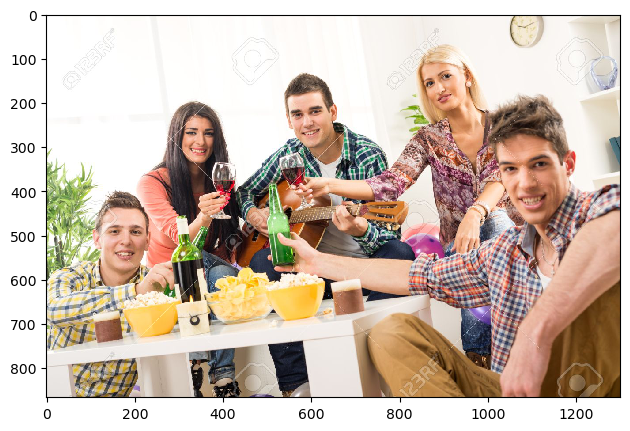

In [30]:
testimage = io.imread('examples/party.jpg')
io.imshow(testimage)

In [31]:
width = 200
height = 200
stride = 50

testfeatures = []
testxy = [] # r1, c1, r2, c2

for startrow in range(0,testimage.shape[0]-height,stride):
    for startcol in range(0,testimage.shape[1]-width,stride):
        endrow = startrow + width
        endcol = startcol + height
        testpatch = testimage[startrow:endrow, startcol:endcol, :]
        testpatch = imNormalize(testpatch)
        testpatch = transform.resize(testpatch,[256,256])
        fd = feature.hog(testpatch, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=False, channel_axis=2)
        testfeatures.append(fd)
        testxy.append([startrow, startcol, endrow, endcol])
        


In [32]:
testfeatures = np.array(testfeatures)
testxy = np.array(testxy)

In [33]:
predictions = model1.predict(testfeatures)

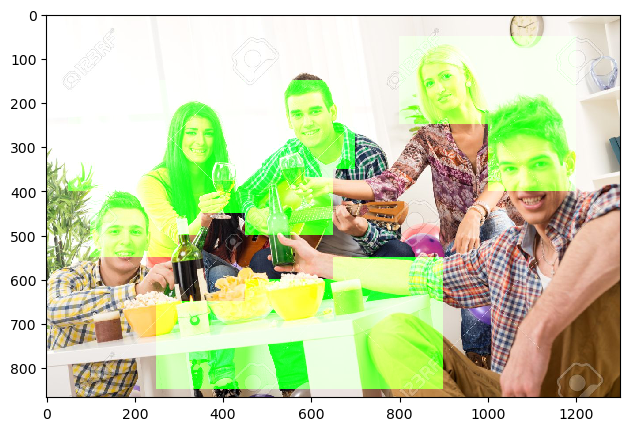

In [34]:
output = np.copy(testimage)
for i in range(testxy.shape[0]):
    if predictions[i] == 1:
        # r1, c1, r2, c2
        r1 = testxy[i, 0]
        c1 = testxy[i, 1]
        r2 = testxy[i, 2]
        c2 = testxy[i, 3]
         # turning that patch green
        output[r1:r2, c1:c2, 1] = 255
    
io.imshow(output)